### CIS 563 - Intro to Data Science
#### HW #3
##### Harper He (xhe128)

**Problem 1 - SAX Method**

In [214]:
# import packages
from collections import defaultdict
from saxpy.strfunc import idx2letter
from saxpy.znorm import znorm
from saxpy.paa import paa
from saxpy.alphabet import cuts_for_asize
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [220]:
# convert time series values to string 
# (without PAA transform or alphabet)
def ts_to_string(series, cuts):
    a_size = len(cuts)
    sax = list()
    for i in range(0, len(series)):
        num = series[i]
        # if teh number below 0, start from the bottom, or else from the top
        if(num >= 0):
            j = a_size - 1
            while ((j > 0) and (cuts[j] >= num)):
                j = j - 1
            sax.append(idx2letter(j))
        else:
            j = 1
            while (j < a_size and cuts[j] <= num):
                j = j + 1
            sax.append(idx2letter(j-1))
    return ''.join(sax)

def sax_by_chunking(series, paa_size, alphabet_size):
    """Simple chunking conversion implementation."""
    paa_rep = paa(znorm(series), paa_size)
    cuts = cuts_for_asize(alphabet_size)
    return ts_to_string(paa_rep, cuts)

In [221]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv', parse_dates=['Date'], index_col='Date')
data.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [222]:
ts=pd.Series(data['Births'])
print(ts.head())
print(ts.max())
print(ts.min())
print(len(ts))

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64
73
23
365


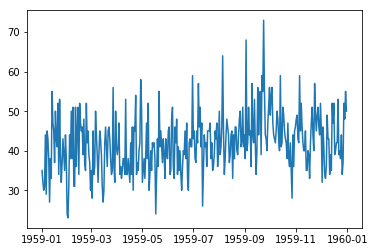

In [223]:
plt.plot(ts)
plt.show()

In [224]:
sax_by_chunking(ts, round(len(ts)/10), alphabet_size=4)

'acbbcbbbbbbcbbbbbccbbcbcccddcbcbdbcc'

**Problem 2 - Weka and Apriori**

The top 10 rules with confidence above 0.8.

 1. biscuits=t vegetables=t 1764 ==> bread and cake=t 1487    <conf:(0.84)> lift:(1.17) lev:(0.05) [217] conv:(1.78)
 2. total=high 1679 ==> bread and cake=t 1413    <conf:(0.84)> lift:(1.17) lev:(0.04) [204] conv:(1.76)
 3. biscuits=t milk-cream=t 1767 ==> bread and cake=t 1485    <conf:(0.84)> lift:(1.17) lev:(0.05) [213] conv:(1.75)
 4. biscuits=t fruit=t 1837 ==> bread and cake=t 1541    <conf:(0.84)> lift:(1.17) lev:(0.05) [218] conv:(1.73)
 5. biscuits=t frozen foods=t 1810 ==> bread and cake=t 1510    <conf:(0.83)> lift:(1.16) lev:(0.04) [207] conv:(1.69)
 6. frozen foods=t fruit=t 1861 ==> bread and cake=t 1548    <conf:(0.83)> lift:(1.16) lev:(0.05) [208] conv:(1.66)
 7. frozen foods=t milk-cream=t 1826 ==> bread and cake=t 1516    <conf:(0.83)> lift:(1.15) lev:(0.04) [201] conv:(1.65)
 8. baking needs=t milk-cream=t 1907 ==> bread and cake=t 1580    <conf:(0.83)> lift:(1.15) lev:(0.04) [207] conv:(1.63)
 9. milk-cream=t fruit=t 2038 ==> bread and cake=t 1684    <conf:(0.83)> lift:(1.15) lev:(0.05) [217] conv:(1.61)
 10. baking needs=t biscuits=t 1764 ==> bread and cake=t 1456    <conf:(0.83)> lift:(1.15) lev:(0.04) [186] conv:(1.6)

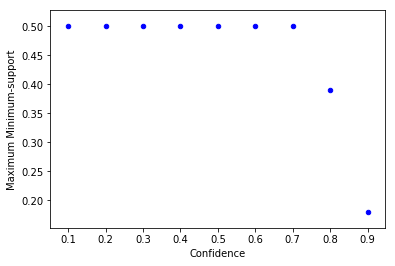

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'Confidence':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'Maximum Minimum-support':[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.39,0.18]
})

# a scatter plot showing the Confidence and its Maximum Minimum-support
df.plot(kind='scatter',x='Confidence',y='Maximum Minimum-support',color='blue')
#plt.show()
#df.plot(kind='line',x='Confidence',y='Maximum Minimum-support',color='blue')

The trend I observed was that when the confidence is between 0.1 to 0.7, the corresponding maximum minimum-support reamins the same, 0.5. When the confidence is above 0.7, the corresponding maximum minimum-support decreases as the confidence increases.

**Problem 3 - PageRank**

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [17]:
G = nx.DiGraph()
pages = ["v1","v2","v3","v4","v5"]
G.add_nodes_from(pages)
G.nodes()
G.add_edges_from([('v1','v2'), ('v1','v5'),('v2','v1'), ('v2','v3'),('v2','v5'),('v3','v5'),('v4','v3'),('v5','v4')])
G.edges()

OutEdgeView([('v1', 'v2'), ('v1', 'v5'), ('v2', 'v1'), ('v2', 'v3'), ('v2', 'v5'), ('v3', 'v5'), ('v4', 'v3'), ('v5', 'v4')])

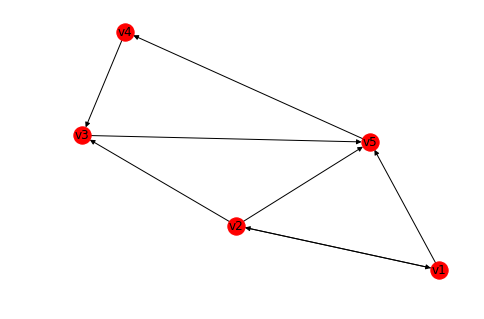

In [18]:
nx.draw(G, with_labels = True)
plt.show() # display

In [27]:
pr = nx.pagerank(G, alpha=0.90,max_iter=200)
pr

{'v1': 0.030057803468208088,
 'v2': 0.03352601156069364,
 'v3': 0.30760427485617486,
 'v4': 0.30838343716040356,
 'v5': 0.3204284729545201}

**Problem 4 - Collaborative Filtering**

In [29]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
import ipywidgets as widgets
from sklearn.metrics import pairwise_distances

In [30]:
# load the data
data = pd.read_csv('ml-100k/u.data', sep="\t", header=None)
# name the columns
data.columns = ["user_id", "item_id", "rating", "timestamp"]
# drop the timestamp column
df = data.drop(columns="timestamp")
df.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [31]:
# convert df to matrix
matrix=df.pivot(index='user_id', columns='item_id',values='rating')
print(matrix.shape)
print(type(matrix))

(943, 1682)
<class 'pandas.core.frame.DataFrame'>


In [32]:
# replace missing values with 0
matrix=matrix.fillna(0)
# check the shape of matrix
print(matrix.shape)
matrix.head()

(943, 1682)


item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*(1) User-based Recommendation Systems*

In [33]:
# calculate the similarity between users (pearson correlation)
user_sim = 1-pairwise_distances(matrix, metric="correlation")
user_sim = pd.DataFrame(user_sim)
user_sim.shape

(943, 943)

In [50]:
# define a function to predicts rating for certain item based on user-based collaborative filtering
def predict_userbased(user_id, item_id, matrix, k):
    prediction=0
    
    def k_similar_users(user_id,matrix,k):
        similarity=[]
        similar_user_id=[]
        model_knn = NearestNeighbors(metric="correlation" ) 
        model_knn.fit(matrix)
        distances, similar_user_id = model_knn.kneighbors(matrix.iloc[user_id-1, :].values.reshape(1, -1), n_neighbors = k+1)
        
        similarity = 1-distances.flatten()
        for i in range(0, len(similar_user_id.flatten())):
            if similar_user_id.flatten()[i]+1 == user_id:
                continue;
            else:
                break
        return similarity,similar_user_id

    similarity,similar_user_id=k_similar_users(user_id, matrix,k) #similar users based on cosine similarity
    mean_rating = matrix.loc[user_id-1,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarity)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(similar_user_id.flatten())):
        if similar_user_id.flatten()[i]+1 == user_id:
            continue;
        else: 
            ratings_diff = matrix.iloc[similar_user_id.flatten()[i],item_id-1]-np.mean(matrix.iloc[similar_user_id.flatten()[i],:])
            product = ratings_diff * (similarity[i])
            wtd_sum = wtd_sum + product
    
    prediction = round(mean_rating + (wtd_sum/sum_wt))
    print('Predicted rating for user {0} to item {1} based on {2} nearest neighbors: {3}'.format(user_id,item_id,k,prediction))

    return prediction

In [51]:
print(predict_userbased(3, 100, matrix,k=800))
print(predict_userbased(20,100,matrix,k=900))

Predicted rating for user 3 to item 100 based on 800 nearest neighbors: 1.0
1.0
Predicted rating for user 20 to item 100 based on 900 nearest neighbors: 2.0
2.0


*(2)  Item-based Recommendation Systems*

In [52]:
# calculate the similarity between itwms (pearson correlation)
item_sim = 1-pairwise_distances(matrix.T, metric="correlation")
item_sim = pd.DataFrame(item_sim)
item_sim.shape

(1682, 1682)

In [56]:
# define a function to predicts rating for certain item based on item-based collaborative filtering
def predict_itembased(user_id, item_id, matrix, k):
    prediction=0
    wtd_sum = 0
    
    def k_similar_items(item_id, matrix, k=k):
        similarity=[]
        similar_item_id=[]   
        matrix=matrix.T
        model_knn = NearestNeighbors(metric = 'correlation')
        model_knn.fit(matrix)
        distances, similar_item_id = model_knn.kneighbors(matrix.iloc[item_id-1, :].values.reshape(1, -1), n_neighbors = k+1)
        similarity = 1-distances.flatten()
        for i in range(0, len(similar_item_id.flatten())):
            if similar_item_id.flatten()[i]+1 == item_id:
                continue;
            else:
                break
        return similarity,similar_item_id

    similarity, similar_item_id=k_similar_items(item_id, matrix) #similar items based on correlation coefficients
    
    sum_wt = np.sum(similarity)-1
    product=1
    
    for i in range(0, len(similar_item_id.flatten())):
        if similar_item_id.flatten()[i]+1 == item_id:
            continue;
        else:
            product = matrix.iloc[user_id-1,similar_item_id.flatten()[i]] * (similarity[i])
            wtd_sum = wtd_sum + product                              
    prediction = round(wtd_sum/sum_wt)
    print ('Predicted rating for user {0} to item {1} based on {2} nearest neighbors: {3}'.format(user_id,item_id,k,prediction))      

    return prediction

In [75]:
print(predict_itembased(200,8,matrix,k=1600))
print(predict_itembased(100,1005,matrix,k=1500))

Predicted rating for user 200 to item 8 based on 1600 nearest neighbors: 1.0
1.0
Predicted rating for user 100 to item 1005 based on 1500 nearest neighbors: 0.0
0.0


**Problem 5 - LoF**

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [78]:
np.random.seed(117)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

In [79]:
# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [82]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

In [84]:
LoFscore_array = np.column_stack((X, X_scores))
LoFscore = pd.DataFrame({'X(X coordinate)': LoFscore_array[:, 0],'X(Y coordinate)': LoFscore_array[:, 1], 'LoF Score': LoFscore_array[:, 2]})
LoFscore.head()

,X(X coordinate),X(Y coordinate),LoF Score
0,1.451570,1.867205,-1.449484
1,2.122503,1.914462,-0.961613
2,2.030699,2.011573,-0.980768
3,2.260088,2.279954,-0.992540
4,2.139519,1.789485,-0.965633


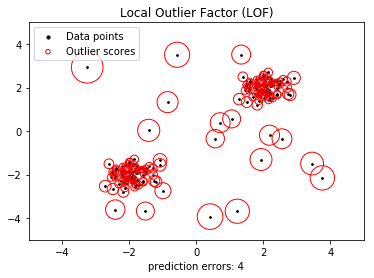

In [85]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()